In [1]:
import torch
from torch import nn
import circuits as ckt
from circuits import Element,Kinds
import learn as lrn
from models import Solver
from models import State
from data import Input

In [2]:
# Get cpu or gpu device for training.
# device = "cuda" if torch.cuda.is_available() else "cpu"
device = "cpu"
print(f"Using {device} device")

# torch.autograd.set_detect_anomaly(True)
torch.set_printoptions(precision=2, linewidth=200)

Using cpu device


# Generate Input Data for a Simple Circuit
Circuit is an independent voltage source and a resistor.

Circuit with 4 nodes and 4 elements
[0, 1, 2, 3]
[(IVS, 3, 0), (R, 1, 0), (R, 2, 1), (R, 3, 2)]
[(3, {}), (0, {}), (1, {}), (2, {})]
[(3, 0, 0, {'kind': <Kinds.IVS: 0>, 'i': -10, 'v': None, 'attr': 1}), (3, 2, 0, {'kind': <Kinds.R: 2>, 'i': None, 'v': None, 'attr': None}), (1, 0, 0, {'kind': <Kinds.R: 2>, 'i': None, 'v': None, 'attr': None}), (2, 1, 0, {'kind': <Kinds.R: 2>, 'i': None, 'v': None, 'attr': None})]


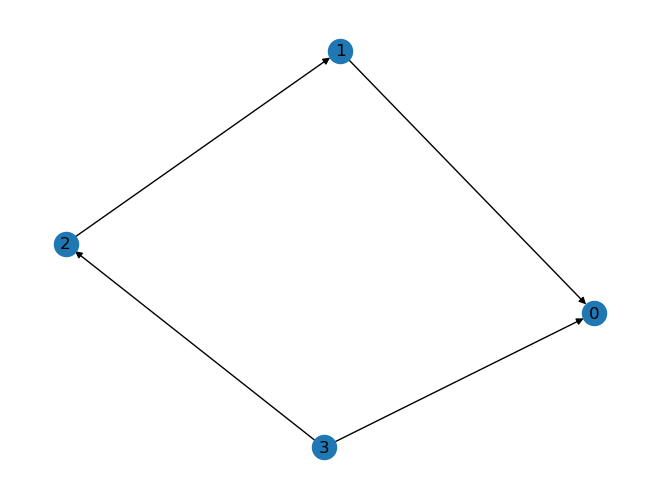

In [3]:
vr = ckt.Circuit()

source = Element(circuit=vr,kind=Kinds.IVS,attr=1,i=-10)
load =Element(circuit=vr,kind=Kinds.R)

vr.ring(source,load,3)
vr

print(vr)
print(vr.nodes)
print(vr.elements)
vr.draw()
print(vr.nx_graph().nodes().data())
print(vr.nx_graph().edges(data=True,keys=True))

# Create Solver

In [4]:
input = Input(vr)

c:\Users\terry\OneDrive\Documents\GitHub\side_circuit\ml\circuits.py:73: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  M_scipy = nx.incidence_matrix(G=self.nx_graph(),oriented=True)


In [5]:
import time

model = Solver(input=input,attr=input.attr_param, state=State.Solve)
start_time = time.time()
X = model()
end_time = time.time()
X

tensor([[-0.80],
        [ 0.80],
        [ 0.80],
        [ 0.80],
        [ 1.00],
        [ 0.22],
        [ 0.14],
        [ 0.64],
        [-0.22],
        [ 0.78],
        [ 0.64]], grad_fn=<LinalgSolveExBackward0>)

In [6]:
print(f'execution time = {(end_time - start_time)*1000} ms')

execution time = 1.9996166229248047 ms


# Learn attributes

In [7]:
num_epochs = 1000
prev_loss = 0.1

model = Solver(input=input, attr=input.attr_param, state=State.Solve)
optimizer = torch.optim.Adam(params=model.parameters(),lr=0.01)
loss, _ = lrn.train(model,optimizer,nn.MSELoss())
print(f'init params: {input.attr_param}')
print(f'init loss: {loss.item()}')

epoch = 0

while(epoch < num_epochs):
    loss, _ = lrn.train(model,optimizer,nn.MSELoss())
    if(loss < 1e-8):
            break
    epoch += 1
    loss_change = abs(loss - prev_loss) / prev_loss
    prev_loss = loss

print(f'Done! at {epoch} passes')
print(f'solution = {model()[1]}')
print(f"attributes = {input.attr_param}")

init params: Parameter containing:
tensor([[1.00],
        [0.27],
        [0.16],
        [0.79]], requires_grad=True)
init loss: 42.36415100097656
Done! at 171 passes
solution = tensor([10.00], grad_fn=<SelectBackward0>)
attributes = Parameter containing:
tensor([[ 1.00],
        [-0.10],
        [-0.21],
        [ 0.42]], requires_grad=True)
